In [1]:
import sys
sys.path.append('/home/sapje1/code/python_mrobjects/qc')
import mriqc
import os
import numpy as np
import matplotlib.pyplot as plt
nii_path = 'C:\\Users\\sapje1\\data\\RoutineQA_examples'
nii_file1 = '20211111_113225WarmingUps002a001.nii'
nii_file2 = '20211111_113225GloverGSQAPs003a001.nii'

In [2]:
first_run = mriqc.FmriQc(nii_path,nii_file1,in_vivo=False)

496.15895342078335 1698.78330124703 4.534686343485826


C:\Users\sapje1\code\python_mrdatamethods\qc\mriqc.py:95: RuntimeWarning: Mean of empty slice
  sig_timeseries = np.nanmean(np.nanmean(np.nanmean(masked_data, axis=3), axis=2), axis=1)


TypeError: unsupported format string passed to tuple.__format__

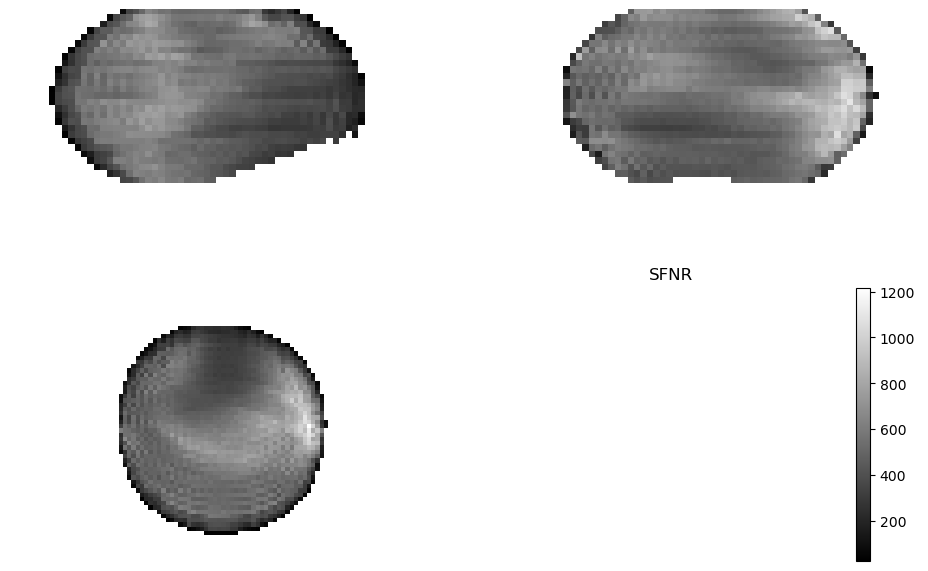

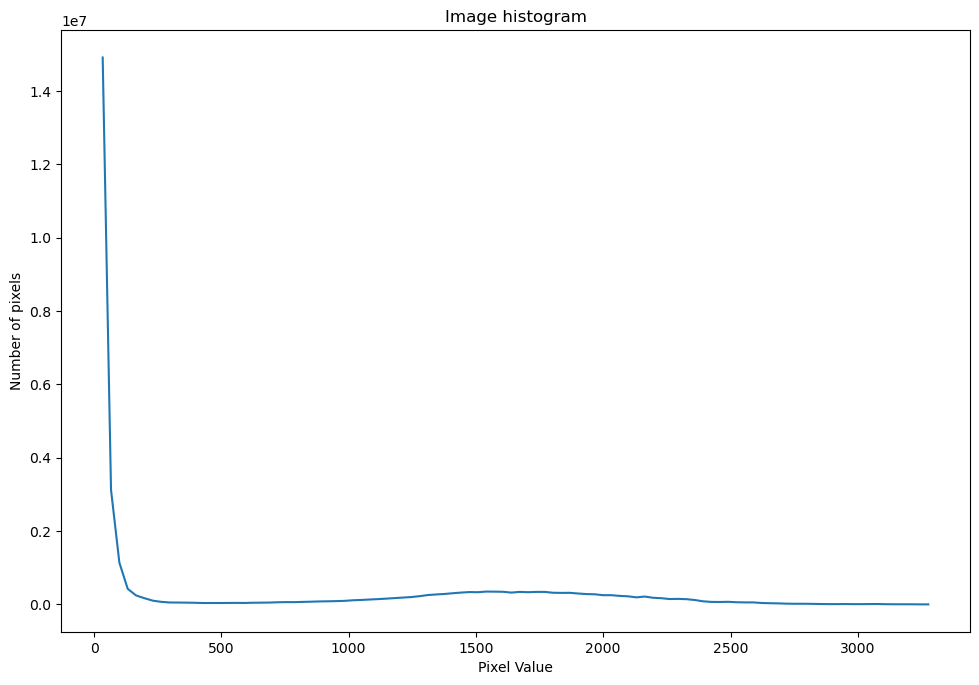

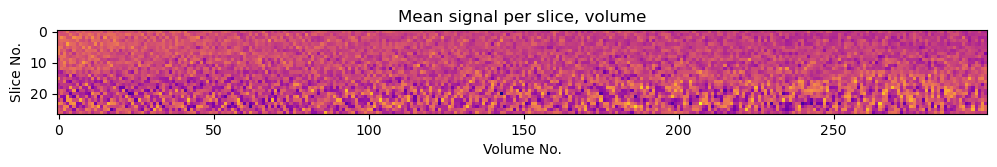

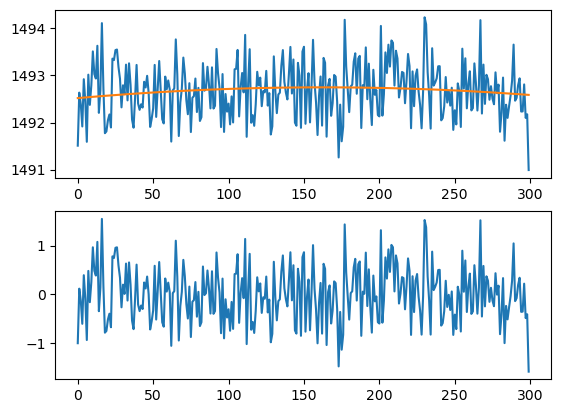

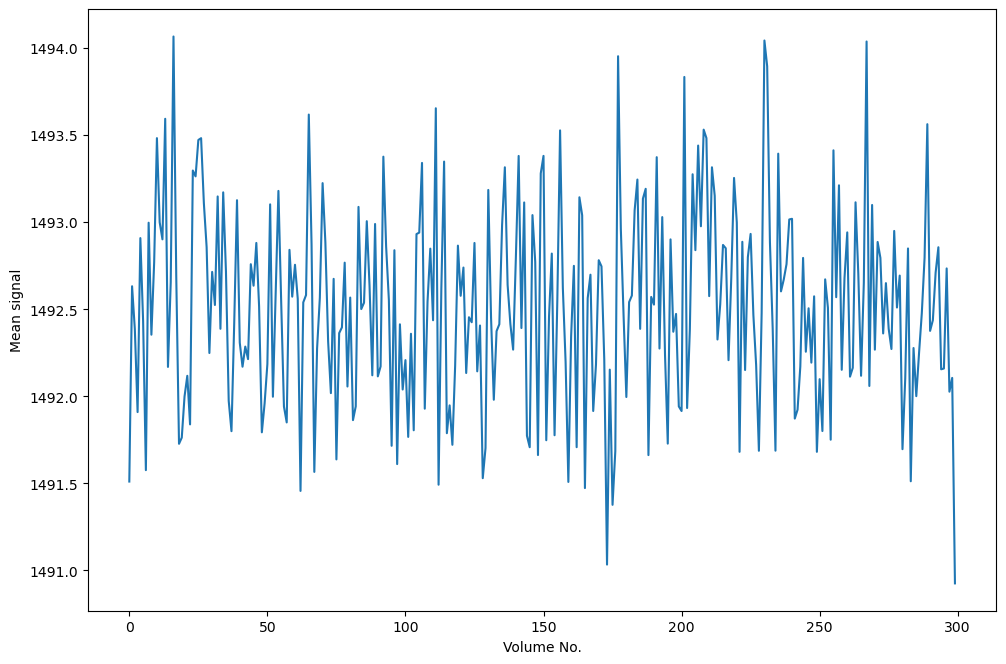

In [3]:
first_run.create_report()

In [ ]:
mid_voi=first_run.voi((10,20,20))

In [ ]:
first_run.calc_sfnr(mask=mid_voi)

In [ ]:
s1=first_run.timeseries(mask=mid_voi,plot=True)

In [ ]:
np.std(s1)

In [ ]:
first_run.vol_data.shape

In [ ]:
mriqc.ortho_view(first_run.vol_stdev)

In [ ]:
dr=first_run.drift_correct(correct=True,mask=mid_voi,plot=True,savepng=True)

In [ ]:
s2=first_run.timeseries(mask=mid_voi, plot=True)

In [ ]:
np.std(s2)

In [ ]:
first_run.basic_stats()
first_run.calc_sfnr(mask=mid_voi)

In [ ]:
mriqc.ortho_view(first_run.vol_stdev)

In [ ]:
def calc_sfnr_by_vol(fmriqc_data, mask=False):
    nvols = fmriqc_data.shape[0]
    sfnr_by_vol = []
    vol = []
    mean_by_vol = []
    stdev_by_vol = []
    sf,mn,st = fmriqc_data.calc_sfnr(mask=mask)
    sfnr_by_vol.append(sf)
    mean_by_vol.append(mn)
    stdev_by_vol.append(st)
    vol.append(nvols)
    for vv in range(nvols,5,-1):
        # this is destructive - would need to reload data to get the full dataset back
        fmriqc_data.vol_data=fmriqc_data.vol_data[0:vv,:,:,:]
        [sf,mn,st] = fmriqc_data.calc_sfnr(mask=mask)
        sfnr_by_vol.append(sf)
        mean_by_vol.append(mn)
        stdev_by_vol.append(st)
        vol.append(vv)
    return(vol, sfnr_by_vol, mean_by_vol, stdev_by_vol)

In [ ]:
[v,sfnr,mn,std]=calc_sfnr_by_vol(first_run,mask=mid_voi)

In [ ]:
fig=plt.figure()
ax=fig.subplots()
ax.plot(v,sfnr)
ax.set_xlabel('Volumes')
ax.set_ylabel('Estimated SFNR')

In [ ]:
fig=plt.figure()
ax=fig.subplots()
ax.plot(v,std)
ax.set_xlabel('Volumes')
ax.set_ylabel('std')

In [ ]:
second_run=mriqc.FmriQc(nii_path,nii_file2,in_vivo=False)

In [ ]:
second_run.vol_data.shape

In [ ]:
[v2,sfnr2,mn2,std2]=calc_sfnr_by_vol(second_run,mask=mid_voi)

In [ ]:
fig3=plt.figure()
ax3=fig3.subplots()
ax3.plot(v2,sfnr2)
ax3.set_xlabel('Volumes')
ax3.set_ylabel('Estimated SFNR (Glover, second run)')

In [ ]:
plt.plot(mn2)